# Информационная безопасность интеллектуальных систем

Верхотуров В.С. БСМО-31-24

## Подготовка данных

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv("seattleWeather_1948-2017.csv")
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [19]:
df['RAIN'].unique()

array([True, False, nan], dtype=object)

In [20]:
df[df['RAIN'].isnull()]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [21]:
df = df.dropna()

In [22]:
df.shape

(25548, 5)

In [23]:
df['RAIN'] = df['RAIN'].astype('int')

In [24]:
df['RAIN'].value_counts()

RAIN
0    14648
1    10900
Name: count, dtype: int64

In [25]:
df = df.drop('DATE',axis=1)

## Обучение

In [26]:
from sklearn.model_selection import train_test_split

y = df.pop('RAIN')
X = df

X_train, X_test, y_train, y_test = (
    train_test_split(X, y, train_size=.75, random_state=8)
)

In [27]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train, y_train)

LogisticRegression()

## AUC

In [28]:
lr_probs = lr_model.predict_proba(X_test)

In [31]:
lr_probs = lr_probs[:, 1]

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

lr_auc = roc_auc_score(y_test, lr_probs)
print('LogisticRegression: AUROC = %.3f' % (lr_auc))

LogisticRegression: AUROC = 0.979


In [34]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

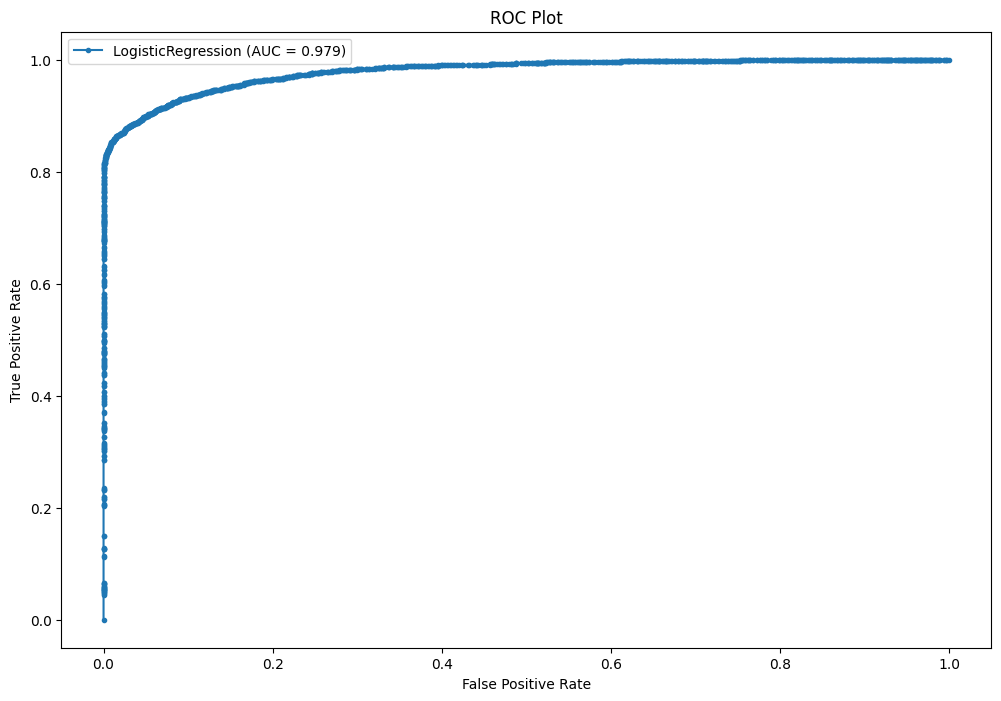

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(lr_fpr, lr_tpr, 
         marker='.', 
         label='LogisticRegression (AUC = %0.3f)' % lr_auc)


plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()

## Noise

LogisticRegression with Noise: AUROC = 0.862


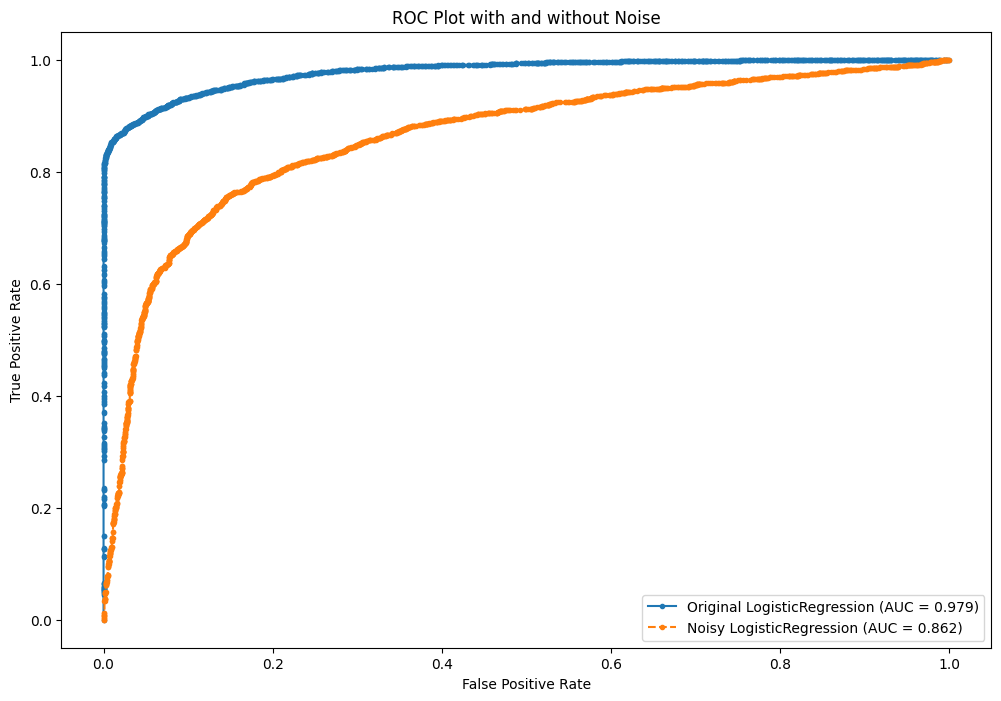

In [36]:
import numpy as np

# Noise, flipping 10%
flip_indices = np.random.choice(y.index, 
                                size=int(0.1 * len(y)), 
                                replace=False)
y_noisy = y.copy()
y_noisy.loc[flip_indices] = 1 - y_noisy.loc[flip_indices]

X_train, X_test, y_train_noisy, y_test_noisy = (
    train_test_split(
    X, y_noisy, train_size=0.75, random_state=8
))

lr_model_noisy = LogisticRegression(solver='lbfgs')
lr_model_noisy.fit(X_train, y_train_noisy)

lr_probs_noisy = lr_model_noisy.predict_proba(X_test)[:, 1]
lr_auc_noisy = roc_auc_score(y_test_noisy, lr_probs_noisy)

print('LogisticRegression with Noise: AUROC = %.3f' % (lr_auc_noisy))

lr_fpr_noisy, lr_tpr_noisy, _ = roc_curve(y_test_noisy, lr_probs_noisy)

plt.figure(figsize=(12, 8))
plt.plot(lr_fpr, lr_tpr, 
         marker='.', 
         label='Original LogisticRegression (AUC = %0.3f)' % lr_auc)
plt.plot(lr_fpr_noisy, lr_tpr_noisy, 
         marker='.', 
         linestyle='--', 
         label='Noisy LogisticRegression (AUC = %0.3f)' % lr_auc_noisy)

plt.title('ROC Plot with and without Noise')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()  
plt.show()
